<center>

# Laboratório CNNs - MNIST

### Professor:
Prof. Paulo Marcelo Tasinaffo

### Integrantes
Marcus Gabriel de Almeida Nunes

Pedro Anacleto Martins Senna De Oliveira

Guilherme Schwinn Fagundes

Kalil Georges Balech

Julio Cesar Coelho de Amorim
</center>

## Importing API and defining figures path

In [156]:
from fastai import *
from fastai.vision.all import *
from fastai.imports import *
from fastai.data.external import untar_data, URLs

from PIL import ImageFile

path = untar_data(URLs.MNIST_TINY)
items = get_image_files(path)

train_path = path/'train'
test_path = path/'test'

In [157]:
PILImageBW.create(items[-1])

## Defining figure method

In [158]:
data_def = DataBlock(
  blocks=(ImageBlock, CategoryBlock),
  get_items=get_image_files,
  get_y=parent_label,
  splitter=RandomSplitter(valid_pct=0.2, seed=42),
  item_tfms=Resize(
    224,
    method=ResizeMethod.Squish,
    pad_mode=PadMode.Zeros
  )
)

## Loading train path

c:\Users\marcu\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


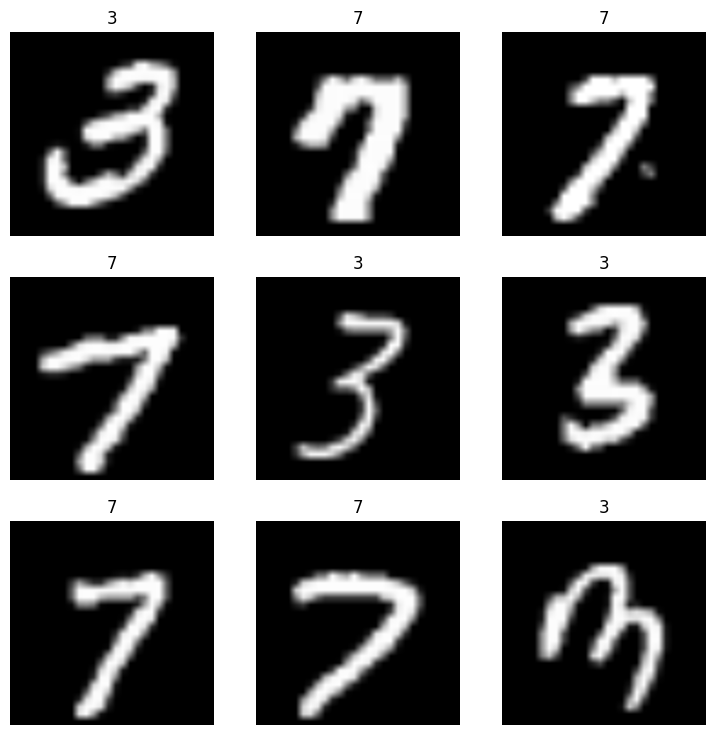

In [159]:
dls = data_def.dataloaders(train_path,
                           bs=20,
                           shuffle=True)

dls.show_batch()

In [160]:
data_def.summary(path)

Setting-up type transforms pipelines
Found 1428 items
2 datasets of sizes 1143,285
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\marcu\.fastai\data\mnist_tiny\valid\7\9690.png
    applying PILBase.create gives
      PILImage mode=RGB size=28x28
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\marcu\.fastai\data\mnist_tiny\valid\7\9690.png
    applying parent_label gives
      7
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=28x28, TensorCategory(1))


Found 1428 items
2 datasets of sizes 1143,285
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pip

Available classes:  ['3', '7']
Data example:  None


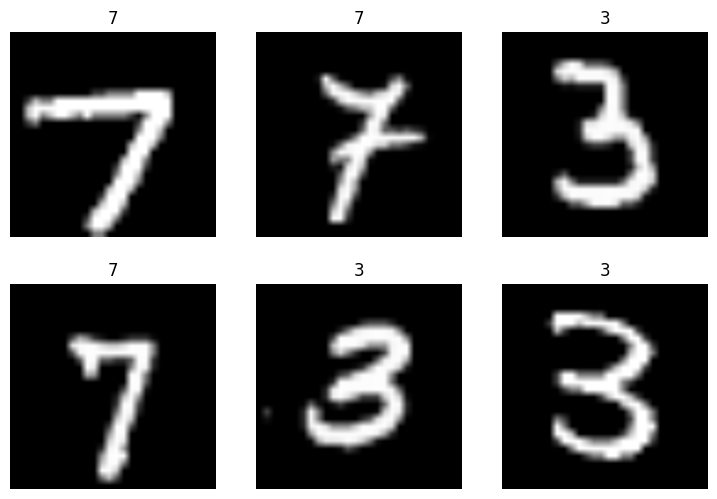

In [161]:
print('Available classes: ', dls.vocab)
print('Data example: ', dls.show_batch(max_n=6, nrows=2))

## Learner model

In [162]:
learner = vision_learner(dls,
                         xresnet18,
                         pretrained=False,
                         metrics=accuracy)

## Find ideal learn rate for the CNN

SuggestedLRs(valley=0.004365158267319202)

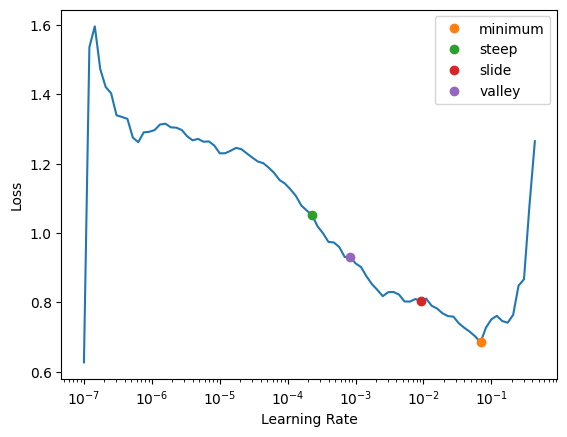

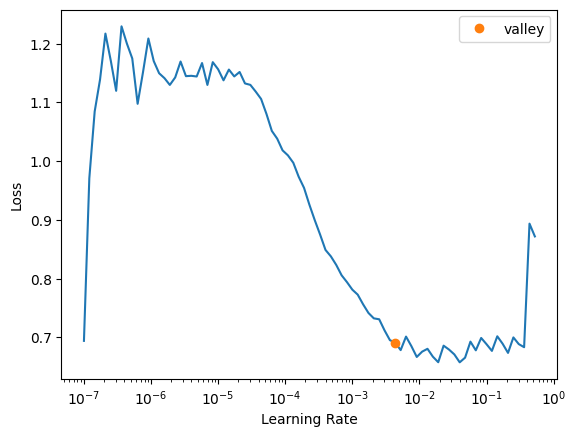

In [163]:
lr_min, lr_steep, lr_slide, lr_valley = learner.lr_find(suggest_funcs = (minimum, steep, slide, valley))
learner.lr_find()

## Adjusting defined method

epoch,train_loss,valid_loss,accuracy,time
0,0.599921,0.828414,0.546099,00:44


Better model found at epoch 0 with valid_loss value: 0.8284144401550293.


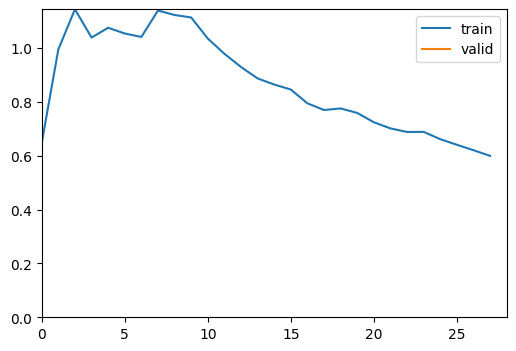

epoch,train_loss,valid_loss,accuracy,time
0,0.259291,0.203362,0.921986,01:01
1,0.205857,0.305505,0.900709,01:02
2,0.157540,0.091364,0.957447,01:01
3,0.134796,0.085019,0.964539,01:02


Better model found at epoch 0 with valid_loss value: 0.20336183905601501.


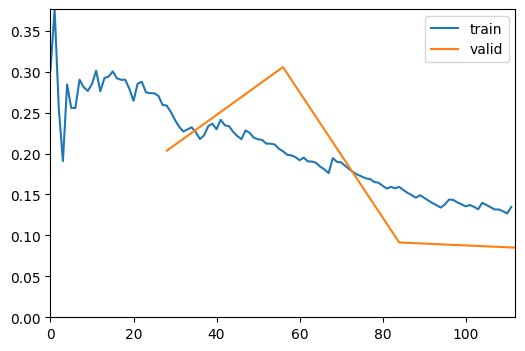

Better model found at epoch 2 with valid_loss value: 0.09136444330215454.
Better model found at epoch 3 with valid_loss value: 0.0850192978978157.


In [164]:
learner.fine_tune(4, lr_valley, cbs=[ShowGraphCallback(), SaveModelCallback(monitor='valid_loss')])

In [165]:
learner.save('learner_1')

Path('models/learner_1.pth')

## Train model with one cycle method for 5 epochs

epoch,train_loss,valid_loss,accuracy,time
0,0.149560,13.800462,0.453901,01:06
1,0.221914,6.813614,0.453901,01:01
2,0.185744,0.134282,0.964539,01:03
3,0.139527,0.130838,0.957447,01:03
4,0.102977,0.025207,0.992908,01:00


Better model found at epoch 0 with valid_loss value: 13.800461769104004.


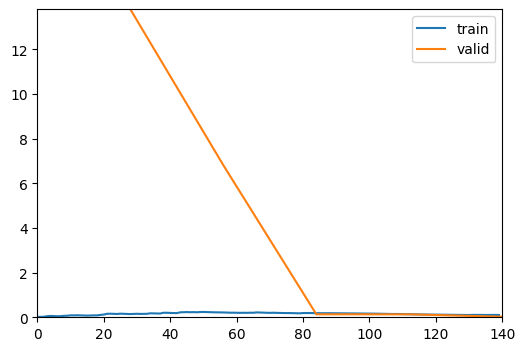

Better model found at epoch 1 with valid_loss value: 6.813614368438721.
Better model found at epoch 2 with valid_loss value: 0.1342821717262268.
Better model found at epoch 3 with valid_loss value: 0.13083846867084503.
Better model found at epoch 4 with valid_loss value: 0.025206567719578743.


In [166]:
learner.fit_one_cycle(5, cbs=[ShowGraphCallback(), SaveModelCallback(monitor='valid_loss')])

## Training results

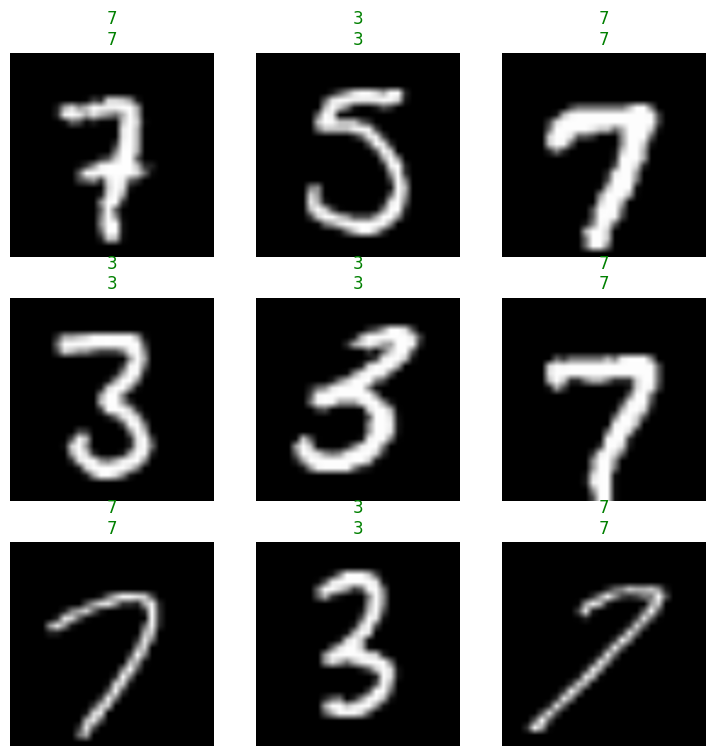

In [167]:
learner.show_results()

## Confusion Matrix

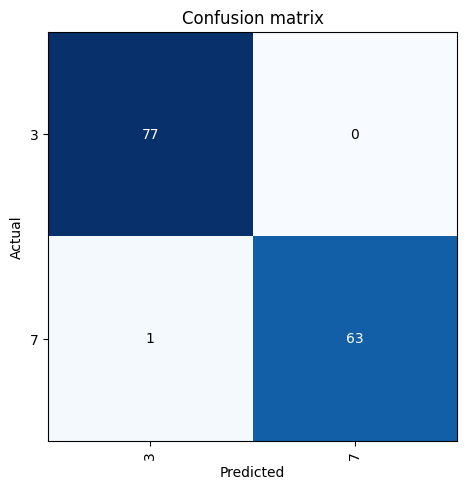

In [168]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

## Top Losses

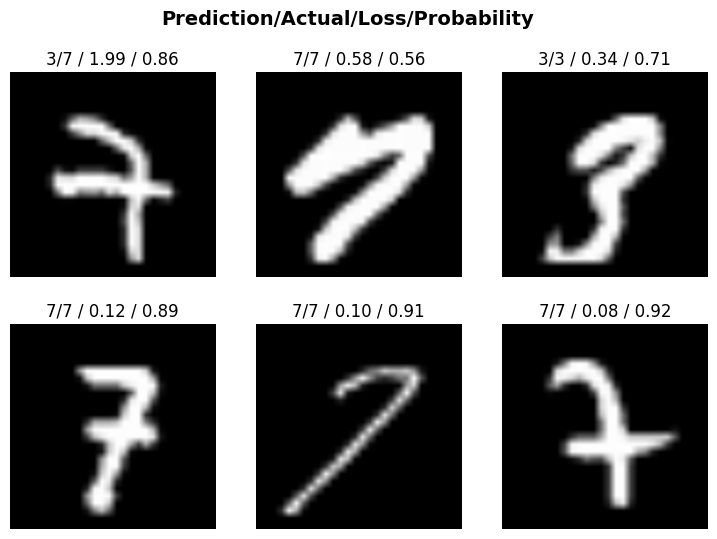

In [169]:
interp.plot_top_losses(6, nrows=2)

## Prediction

In [182]:
warnings.filterwarnings("ignore")
from PIL import Image
import os

images = [file for file in os.listdir(test_path) if file.endswith('.png')]

for file in images:
    img_path = test_path/file
    img = Image.open(img_path)

    prediction = learner.predict(img_path)[0]

    print(f'File: {file} - Prediction: {prediction}')
    display(img)

File: 1503.png - Prediction: 3


File: 1605.png - Prediction: 3


File: 1883.png - Prediction: 7


File: 2032.png - Prediction: 3


File: 205.png - Prediction: 3


File: 2642.png - Prediction: 7


File: 3515.png - Prediction: 3


File: 3848.png - Prediction: 7


File: 3878.png - Prediction: 7


File: 4605.png - Prediction: 3


File: 4654.png - Prediction: 7


File: 500.png - Prediction: 3


File: 5071.png - Prediction: 7


File: 585.png - Prediction: 7


File: 5988.png - Prediction: 7


File: 617.png - Prediction: 7


File: 6335.png - Prediction: 7


File: 6501.png - Prediction: 3


File: 6517.png - Prediction: 3


File: 6736.png - Prediction: 3
